In [3]:
import pandas as pd
import numpy as np

import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
new = pd.read_excel(r"C:\Users\swapn\Downloads\Car Price Prediction.xlsx")
new

,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Resale
0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,16.360
1,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,19.875
2,35.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,18.225
3,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,29.725
4,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,22.255
...,...,...,...,...,...,...,...,...,...,...
151,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25,18.061
152,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25,18.061
153,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25,18.061
154,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23,18.061


In [5]:
new.isnull().sum()

Price in thousands    0
Engine size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb weight           0
Fuel capacity         0
Fuel efficiency       0
Resale                0
dtype: int64

In [6]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price in thousands  156 non-null    float64
 1   Engine size         156 non-null    float64
 2   Horsepower          156 non-null    int64  
 3   Wheelbase           156 non-null    float64
 4   Width               156 non-null    float64
 5   Length              156 non-null    float64
 6   Curb weight         156 non-null    float64
 7   Fuel capacity       156 non-null    float64
 8   Fuel efficiency     156 non-null    int64  
 9   Resale              156 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 12.3 KB


In [7]:
new.describe()

,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Resale
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,27.439532,3.060897,185.948718,107.487179,71.150000,187.343590,3.381949,17.951923,23.878205,18.060808
std,14.318249,1.044653,56.700321,7.641303,3.451872,13.431754,0.630372,3.887921,4.296049,10.076940
min,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,5.160000
25%,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,12.527500
50%,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,17.617500
75%,32.253750,3.575000,215.000000,112.200000,73.425000,196.125000,3.821500,19.575000,26.000000,18.080750
max,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,67.550000


<AxesSubplot:>

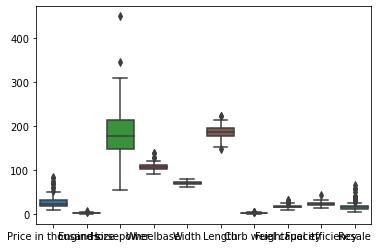

In [8]:
sns.boxplot(data=new)

In [9]:
q1 = new['Horsepower'].quantile(0.25)
q3 = new['Horsepower'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
upper_limit

313.25

In [10]:
new['Horsepower']=np.where(new['Horsepower']> upper_limit,upper_limit,new['Horsepower'])

<AxesSubplot:>

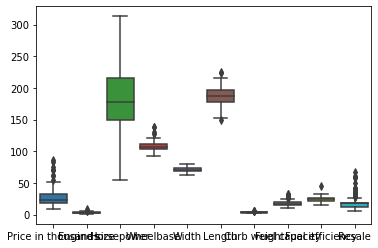

In [11]:
sns.boxplot(data=new)

In [12]:
q1 = new['Engine size'].quantile(0.25)
q3 = new['Engine size'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
upper_limit

5.487500000000001

In [13]:
new['Engine size']=np.where(new['Engine size']> upper_limit,upper_limit,new['Engine size'])

<AxesSubplot:>

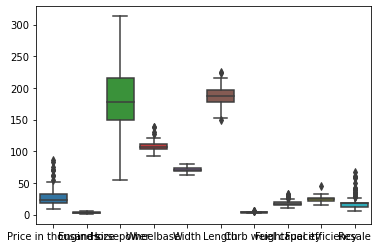

In [14]:
sns.boxplot(data=new)

In [15]:
q1 = new['Price in thousands'].quantile(0.25)
q3 = new['Price in thousands'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
upper_limit

53.51249999999999

In [16]:
new['Price in thousands']=np.where(new['Price in thousands']> upper_limit,upper_limit,new['Price in thousands'])

<AxesSubplot:>

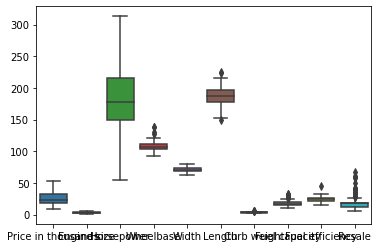

In [17]:
sns.boxplot(data=new)

In [18]:
q1 = new['Wheelbase'].quantile(0.25)
q3 = new['Wheelbase'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
upper_limit

126.0

In [19]:
new['Wheelbase']=np.where(new['Wheelbase']> upper_limit,upper_limit,new['Wheelbase'])

<AxesSubplot:>

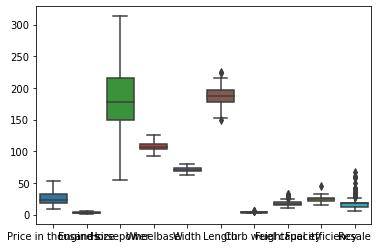

In [20]:
sns.boxplot(data=new)

In [21]:
q1 = new['Width'].quantile(0.25)
q3 = new['Width'].quantile(0.75)
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
upper_limit

80.96250000000002

In [22]:
new['Width']=np.where(new['Width']> upper_limit,upper_limit,new['Width'])

<AxesSubplot:>

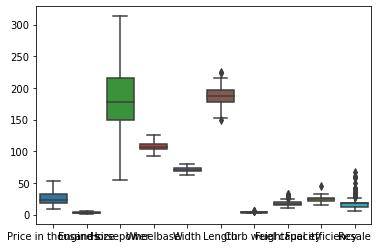

In [23]:
sns.boxplot(data=new)

In [24]:
q1 = new['Length'].quantile(0.25)
q3 = new['Length'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
print(upper_limit)
lower_limit = q3 - 1.5*iqr
print(lower_limit)

223.95000000000002
168.29999999999998


In [25]:
new['Length']=np.where(new['Length']> upper_limit,upper_limit,new['Length'])
new['Length']=np.where(new['Length']< lower_limit,lower_limit,new['Length'])

<AxesSubplot:>

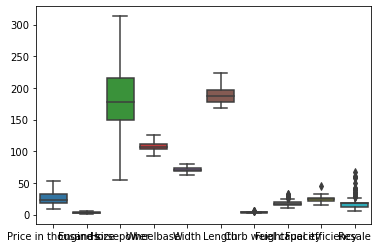

In [26]:
sns.boxplot(data=new)

In [27]:
q1 = new["Curb weight"].quantile(0.25)
q3 = new['Curb weight'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

5.094250000000001

In [28]:
new['Curb weight']=np.where(new['Curb weight']> upper_limit,upper_limit,new['Curb weight'])

<AxesSubplot:>

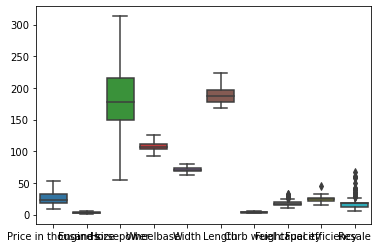

In [29]:
sns.boxplot(data=new)

In [30]:
q1 = new['Fuel capacity'].quantile(0.25)
q3 = new['Fuel capacity'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

25.237499999999997

In [31]:
new['Fuel capacity']=np.where(new['Fuel capacity']> upper_limit,upper_limit,new['Fuel capacity'])

<AxesSubplot:>

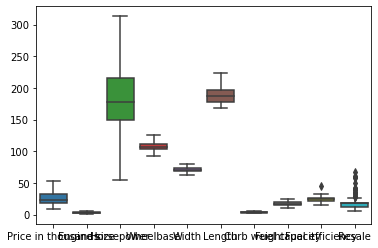

In [32]:
sns.boxplot(data=new)

In [33]:
q1 = new['Fuel efficiency'].quantile(0.25)
q3 = new['Fuel efficiency'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

33.5

In [34]:
new['Fuel efficiency']=np.where(new['Fuel efficiency']> upper_limit,upper_limit,new['Fuel efficiency'])

<AxesSubplot:>

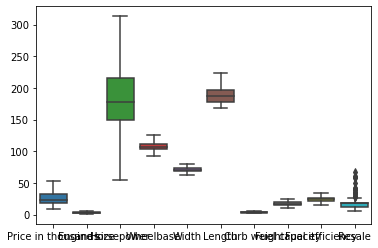

In [35]:
sns.boxplot(data=new)

In [36]:
q1 = new['Resale'].quantile(0.25)
q3 = new['Resale'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

26.410625000000003

In [37]:
new['Resale']=np.where(new['Resale']> upper_limit,upper_limit,new['Resale'])

<AxesSubplot:>

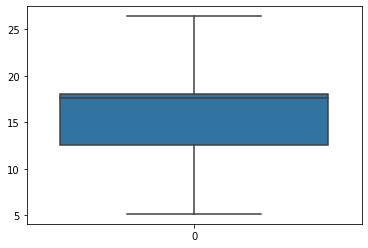

In [38]:
sns.boxplot(data=new['Resale'])

In [39]:
new.head()

,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Resale
0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,16.360000
1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,19.875000
2,35.00,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,18.225000
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,26.410625
4,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,22.255000


In [40]:
X = new.drop('Price in thousands',axis= 1)

Y = new[['Price in thousands']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, train_size=0.7 ,random_state=120)

In [41]:
df = pd.concat([Y_train, X_train], axis=1)
df.head()

,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Resale
59,26.60,3.2,205.0,106.4,70.4,178.2,3.857,21.1,19.0,17.525000
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,26.410625
113,12.64,2.0,132.0,105.0,74.4,174.4,2.559,12.5,29.0,7.750000
85,16.24,2.0,125.0,106.5,69.1,184.8,2.769,15.0,28.0,8.800000
152,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,18.061000


In [42]:
df.corr()

,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Resale
Price in thousands,1.000000,0.685318,0.863159,0.354456,0.399111,0.280473,0.665501,0.586666,-0.639801,0.796531
Engine size,0.685318,1.000000,0.853995,0.646645,0.748226,0.686312,0.841272,0.738217,-0.768990,0.521691
Horsepower,0.863159,0.853995,1.000000,0.526106,0.591380,0.516032,0.728509,0.653151,-0.690752,0.681591
Wheelbase,0.354456,0.646645,0.526106,1.000000,0.769064,0.847917,0.718730,0.718502,-0.588670,0.270131
Width,0.399111,0.748226,0.591380,0.769064,1.000000,0.747533,0.716050,0.644602,-0.625157,0.243570
Length,0.280473,0.686312,0.516032,0.847917,0.747533,1.000000,0.673194,0.650207,-0.497012,0.212345
Curb weight,0.665501,0.841272,0.728509,0.718730,0.716050,0.673194,1.000000,0.884869,-0.877579,0.561268
Fuel capacity,0.586666,0.738217,0.653151,0.718502,0.644602,0.650207,0.884869,1.000000,-0.820991,0.492448
Fuel efficiency,-0.639801,-0.768990,-0.690752,-0.588670,-0.625157,-0.497012,-0.877579,-0.820991,1.000000,-0.525690
Resale,0.796531,0.521691,0.681591,0.270131,0.243570,0.212345,0.561268,0.492448,-0.525690,1.000000


<AxesSubplot:>

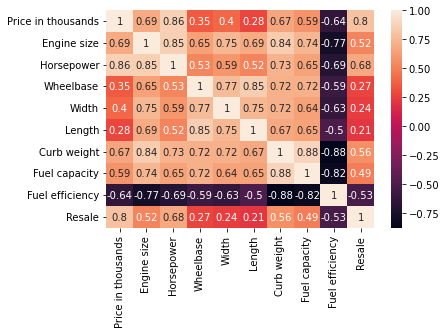

In [43]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'Engine size vs Resale'}, xlabel='Horsepower', ylabel='Price in thousands'>

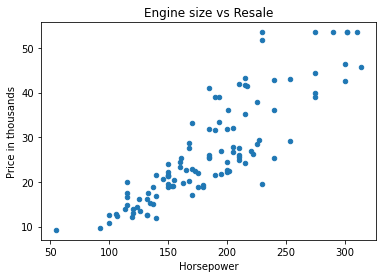

In [44]:
df.plot.scatter(x = 'Horsepower', y = 'Price in thousands', title = 'Engine size vs Resale')

### Horsepower has 86% collinearity with price in thousands

In [45]:
X.values

array([[  1.8  , 140.   , 101.2  , ...,  13.2  ,  28.   ,  16.36 ],
       [  3.2  , 225.   , 108.1  , ...,  17.2  ,  25.   ,  19.875],
       [  3.2  , 225.   , 106.9  , ...,  17.2  ,  26.   ,  18.225],
       ...,
       [  2.4  , 168.   , 104.9  , ...,  17.9  ,  25.   ,  18.061],
       [  2.3  , 236.   , 104.9  , ...,  18.5  ,  23.   ,  18.061],
       [  2.9  , 201.   , 109.9  , ...,  21.1  ,  24.   ,  18.061]])

In [46]:
X.shape[1]

9

In [47]:
X.columns

Index(['Engine size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb weight', 'Fuel capacity', 'Fuel efficiency', 'Resale'],
      dtype='object')

In [48]:
X=df.drop(['Price in thousands'],axis=1)
series_before = pd.Series([variance_inflation_factor(X.values, i) 
                           for i in range(X.shape[1])],  
                          index=X.columns)  
series_before

Engine size          73.154110
Horsepower           67.852012
Wheelbase          1256.093315
Width               881.417728
Length             1082.924388
Curb weight         283.221581
Fuel capacity       135.531021
Fuel efficiency     138.604270
Resale               23.117922
dtype: float64

In [49]:
X1=df.loc[:,['Engine size', 'Fuel efficiency']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Engine size        4.960796
Fuel efficiency    4.960796
dtype: float64

In [50]:
 df.rename(columns = {'Fuel efficiency':'fuel_efficiency','Engine size':'engine_size','Price in thousands':'price_in_thousands'}, inplace = True)

In [51]:
import statsmodels.formula.api as smf
model = smf.ols('price_in_thousands ~ engine_size + fuel_efficiency',data=df).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     price_in_thousands   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     53.17
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           1.02e-16
Time:                        10:13:19   Log-Likelihood:                -383.10
No. Observations:                 109   AIC:                             772.2
Df Residuals:                     106   BIC:                             780.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          29.5489     10.488      2.818      0.006       8.756      50.342
engine_size         5.3553      1.215      4.407      0.000       2.946       7.765
fuel_efficiency    -0.7824      0.304     -2.571      0.012      -1.386      -0.179
==============================================================================
Omnibus:                        3.779   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.180
Skew:                           0.392   Prob(JB):                        0.204
Kurtosis:                       3.290   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
df.head()

,price_in_thousands,engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,fuel_efficiency,Resale
59,26.60,3.2,205.0,106.4,70.4,178.2,3.857,21.1,19.0,17.525000
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,26.410625
113,12.64,2.0,132.0,105.0,74.4,174.4,2.559,12.5,29.0,7.750000
85,16.24,2.0,125.0,106.5,69.1,184.8,2.769,15.0,28.0,8.800000
152,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,18.061000


In [53]:
df['fitted_value']=model.fittedvalues #Predicted Value
df['residual']=model.resid  #Error
df.head()

,price_in_thousands,engine_size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,fuel_efficiency,Resale,fitted_value,residual
59,26.60,3.2,205.0,106.4,70.4,178.2,3.857,21.1,19.0,17.525000,31.820169,-5.220169
3,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,26.410625,31.079548,10.920452
113,12.64,2.0,132.0,105.0,74.4,174.4,2.559,12.5,29.0,7.750000,17.569794,-4.929794
85,16.24,2.0,125.0,106.5,69.1,184.8,2.769,15.0,28.0,8.800000,18.352197,-2.112197
152,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,18.061000,22.841521,4.658479


<AxesSubplot:title={'center':'distance_to_the_nearest_MRT_station vs house_price'}, xlabel='Horsepower', ylabel='price_in_thousands'>

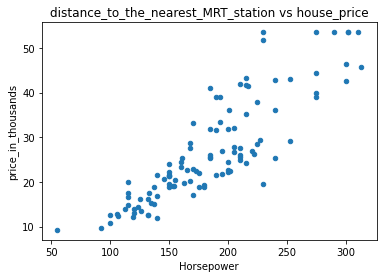

In [54]:
df.plot.scatter(x='Horsepower', y='price_in_thousands', title='distance_to_the_nearest_MRT_station vs house_price')

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

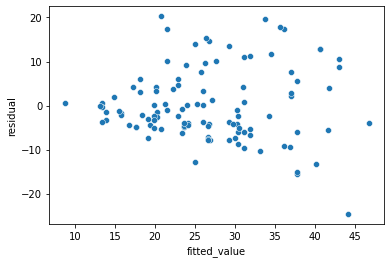

In [55]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

C:\Users\swapn\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


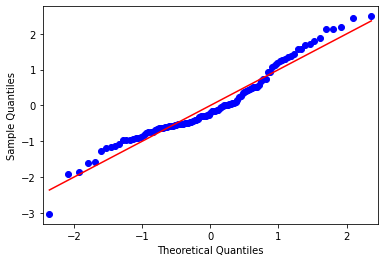

In [56]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<AxesSubplot:ylabel='Frequency'>

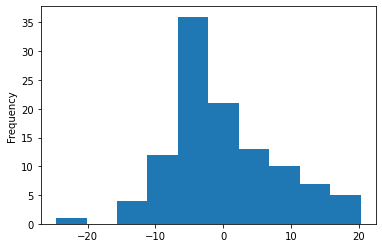

In [57]:
df['residual'].plot.hist()

In [58]:
df_test=pd.concat([X_test,Y_test],axis=1)

df_test.head()

,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Resale,Price in thousands
18,5.4875,255.0,117.5,77.0,201.2,5.09425,25.2375,15.0,18.061000,46.225
154,2.3000,236.0,104.9,71.5,185.7,3.60100,18.5000,23.0,18.061000,45.500
30,2.7000,200.0,113.0,74.4,209.1,3.45200,17.0000,26.0,13.725000,22.245
69,3.0000,210.0,105.1,70.5,190.2,3.37300,18.5000,23.0,26.410625,31.505
118,3.4000,175.0,107.0,70.4,186.3,3.09100,15.2000,25.0,10.290000,19.720


In [59]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'engine_size' is not defined
    price_in_thousands ~ engine_size + fuel_efficiency
                         ^^^^^^^^^^^